# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.227497354 W= 0.0331716 b= 2.35839
Epoch: 0100 cost= 0.210145667 W= 0.046043 b= 2.2658
Epoch: 0150 cost= 0.194795355 W= 0.0581487 b= 2.17871
Epoch: 0200 cost= 0.181215361 W= 0.0695347 b= 2.0968
Epoch: 0250 cost= 0.169202000 W= 0.0802433 b= 2.01976
Epoch: 0300 cost= 0.158573911 W= 0.0903153 b= 1.9473
Epoch: 0350 cost= 0.149171427 W= 0.0997884 b= 1.87915
Epoch: 0400 cost= 0.140853718 W= 0.108698 b= 1.81506
Epoch: 0450 cost= 0.133495048 W= 0.117077 b= 1.75478
Epoch: 0500 cost= 0.126984879 W= 0.124959 b= 1.69808
Epoch: 0550 cost= 0.121225297 W= 0.132371 b= 1.64476
Epoch: 0600 cost= 0.116129875 W= 0.139343 b= 1.5946
Epoch: 0650 cost= 0.111621924 W= 0.1459 b= 1.54743
Epoch: 0700 cost= 0.107633874 W= 0.152067 b= 1.50307
Epoch: 0750 cost= 0.104105644 W= 0.157867 b= 1.46134
Epoch: 0800 cost= 0.100984015 W= 0.163322 b= 1.4221
Epoch: 0850 cost= 0.098222159 W= 0.168453 b= 1.38518
Epoch: 0900 cost= 0.095778584 W= 0.173279 b= 1.35047
Epoch: 0950 cost= 0.093616545 W= 0.177818 b= 1.

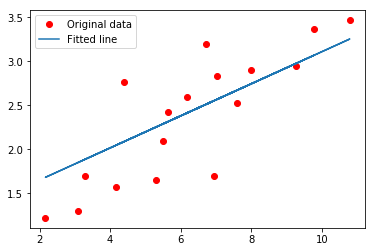

In [10]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()